#**Stroke Prediction**
**January  2023**

**Sami Or Yermiyahu**



#**1. Introduction**

**Stroke**

---
**Stroke** can strike at any age. **But what is stroke?** Stroke, also called brain at­tack, occurs when blood flow to the brain is disrupt­ed. Disruption in blood flow is caused when either a blood clot blocks one of the vital blood vessels in the brain (ischemic stroke), or when a blood vessel in the brain bursts, spilling blood into surrounding tissues (hemor­rhagic stroke).

---
Predicting stroke can prevent irreversible damage among the population at risk. The goal of this notebook is to build a model that will predict stroke (binary prediction) with high accuracy and **RECALL** (The goal is to identify everyone who is going to have a stroke) based on a number of individual features. Successful forecasting can have health and financial benefits.

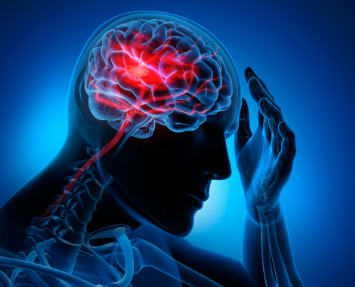

**Dataset Features (40,910 rows):**

---
1. **gender**: patient's gender (1: male; 0: female).
2. **age**: patient's age (in years).
3. **hypertension**: patient has ever had hypertension (1) or not (0).
4. **heart_disease**: patient has ever had heart_disease(1) or not (0).
5. **ever_married**: patient married (1) or not (0).
6. **work_type**: patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private.
7. **Residence_type**: patient area: 1 - Urban, 0 - Rural.
8. **avg_glucose_level**: patient average blood sugar level.
9. **bmi**: Body Mass Index.
10. **smoking_status**: 1 - smokes, 0 - never smoked.

---


11. **stroke**: Whether the patient has stroke (1) or not (0).



#**2. Connections & Import Libraries**

###**2.1 Connections**

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd

#Loading the datafrom sklearn.linear_model import LogisticRegressionCV

filepath = '/content/gdrive/MyDrive/ML-Project/stroke.csv'
data = pd.read_csv(filepath)

Mounted at /content/gdrive


In [13]:
!pip install numpy
!pip install scikit-learn==0.22

  Using cached scikit-learn-0.22.tar.gz (6.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "<string>", line 195, in check_package_status
        File "/usr/local/python/3.10.8/lib/python3.10/importlib/__init__.py", line 126, in import_module
          return _bootstrap._gcd_import(name[level:], package, level)
        File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
        File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
        File "<frozen importlib._b

###**2.2 Import Libraries**

In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score, plot_confusion_matrix
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

#**3. EDA - Exploratory Data Analysis**

###**3.1 General**

Data Exploratory:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 40910 entries, 0 to 40909

Data columns (total 11 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   gender             40907 non-null  float64

 1   age                40910 non-null  int64  

 2   hypertension       40910 non-null  int64  

 3   heart_disease      40910 non-null  int64  

 4   ever_married       40910 non-null  int64  

 5   work_type          40910 non-null  int64  

 6   Residence_type     40910 non-null  int64  

 7   avg_glucose_level  40910 non-null  float64

 8   bmi                40910 non-null  float64

 9   smoking_status     40910 non-null  int64  

 10  stroke             40910 non-null  int64  

dtypes: float64(3), int64(8)

memory usage: 3.4 MB


There are 3 rows that are missing a value in the "gender" column - because of the negligible count, I will arbitrarily set them to be female, i.e. 0.

In [ ]:
data["gender"].fillna(0, inplace = True)

In [ ]:
#Check if there are NA values.
data.isnull().sum().any()

False

In [ ]:
#Check if there are duplicate values.
data.duplicated().sum()

0

Now, there is no missing/duplicate data.

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,80,1,0,1,4,1,87.96,39.2,0,0
1,1.0,42,0,0,1,4,0,69.04,35.9,1,0
2,0.0,47,0,0,1,4,1,77.59,17.7,1,0
3,1.0,50,0,1,1,3,0,243.53,27.0,0,0
4,1.0,42,0,0,1,4,0,77.67,32.3,1,0


In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555121,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496958,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


To analyze the data in a better way, I decided to convert the coding to the real values.

In [ ]:
data_vis = data.copy()

In [ ]:
data_vis.gender[data_vis['gender'] == 0] = 'Female'
data_vis.gender[data_vis['gender'] == 1] = 'Male'

data_vis.hypertension[data_vis['hypertension'] == 0] = 'Not had hypertension'
data_vis.hypertension[data_vis['hypertension'] == 1] = 'Had hypertension'

data_vis.heart_disease[data_vis['heart_disease'] == 0] = 'Not had heart disease'
data_vis.heart_disease[data_vis['heart_disease'] == 1] = 'Had heart disease'

data_vis.ever_married[data_vis['ever_married'] == 0] = 'No'
data_vis.ever_married[data_vis['ever_married'] == 1] = 'Yes'

data_vis.work_type[data_vis['work_type'] == 0] = 'Never worked'
data_vis.work_type[data_vis['work_type'] == 1] = 'Children'
data_vis.work_type[data_vis['work_type'] == 2] = 'Govt job'
data_vis.work_type[data_vis['work_type'] == 3] = 'Self-employed'
data_vis.work_type[data_vis['work_type'] == 4] = 'Private'

data_vis.Residence_type[data_vis['Residence_type'] == 0] = 'Urban'
data_vis.Residence_type[data_vis['Residence_type'] == 1] = 'Rural'

data_vis.smoking_status[data_vis['smoking_status'] == 0] = 'Never smoked'
data_vis.smoking_status[data_vis['smoking_status'] == 1] = 'Smokes'

data_vis.stroke[data_vis['stroke'] == 0] = 'No'
data_vis.stroke[data_vis['stroke'] == 1] = 'Yes'

In [ ]:
unique_values = {}
for col in data_vis.columns:
    unique_values[col] = data_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
gender,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


1. The "work_type" column will need One Hot Encoder to process in nominal categorical data.
2. "age", "avg_glucose_level" and "bmi" columns will be processed using Binning or Scaling.

###**3.2 Frequency of the value of the features in the dataset.**

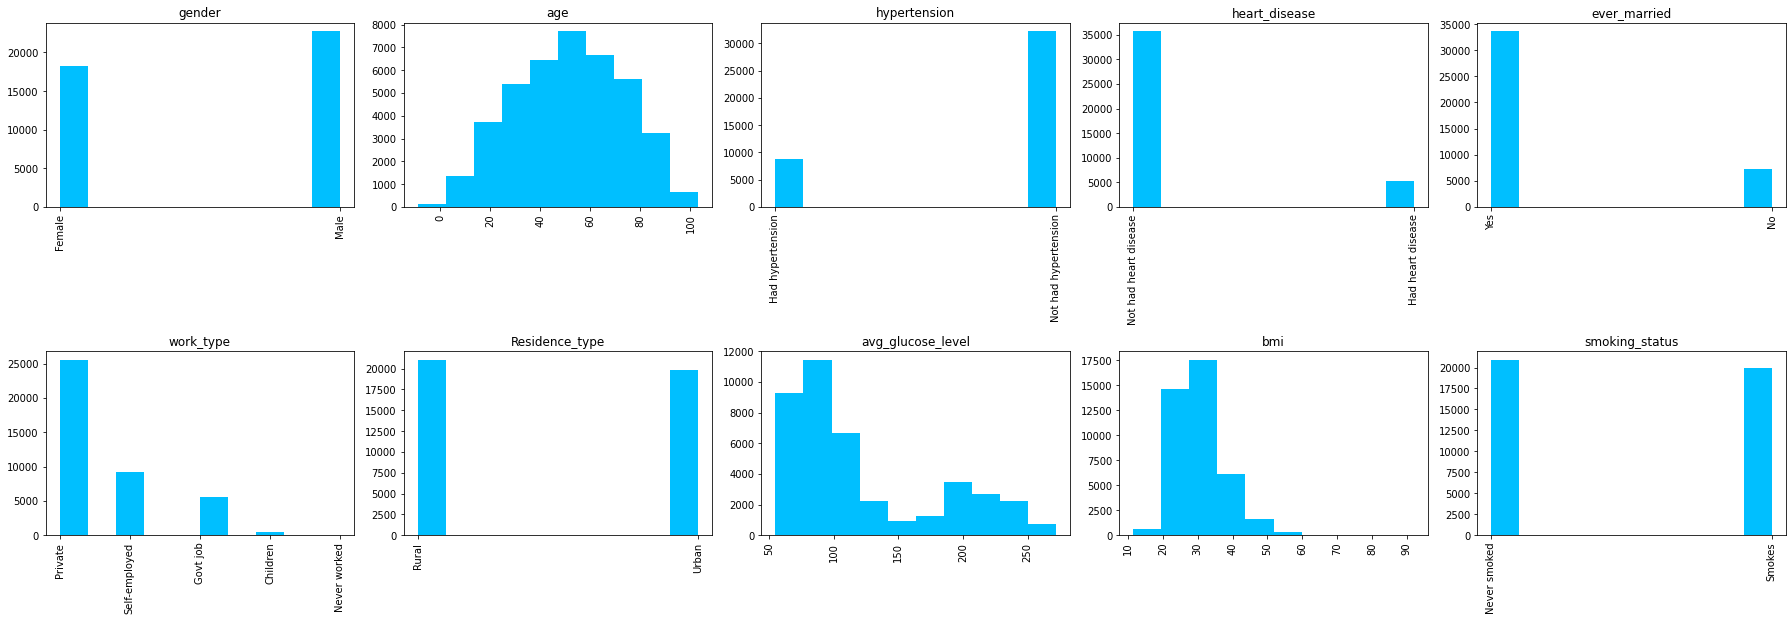

In [ ]:
# All data columns except for color
feature_cols = [x for x in data_vis.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data_vis[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

There can't be a negative age - drop these rows.

In [ ]:
data = data.drop(data[data.age < 0].index)
data_vis = data_vis.drop(data_vis[data_vis.age < 0].index)
len(data. index)

40852

I dropped 58 rows.

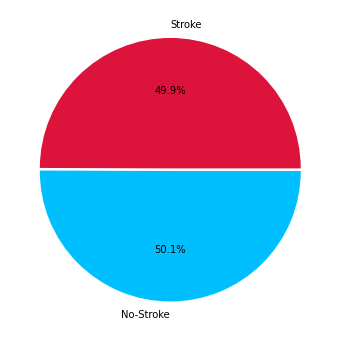

In [ ]:
# Traget values frequency
plt.figure(figsize=(8,6))
labels = ['Stroke', 'No-Stroke']
sizes = [data_vis['stroke'].value_counts()['Yes'],data_vis['stroke'].value_counts()['No']]
colors = ['crimson', 'deepskyblue']
explode = (0.01,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data_vis);

The prediction column classes are balanced.

###**3.3 Correlation between each feature and stroke**

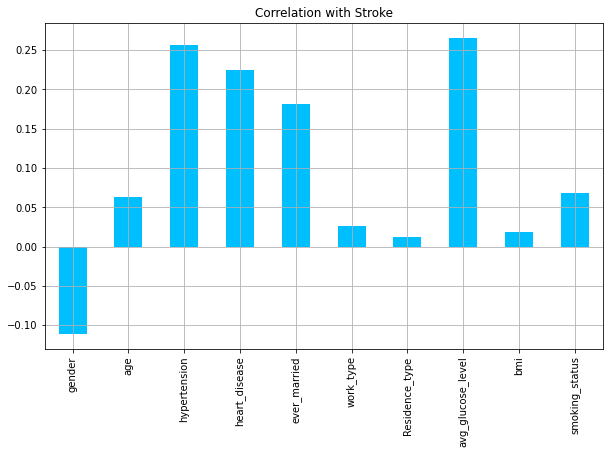

In [ ]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue");

The features "bmi", "Residence_type", "work_type" are least correlated with Storke.
All other features have a significant correlation with Stroke.

###**3.4 Correlation between any two features**

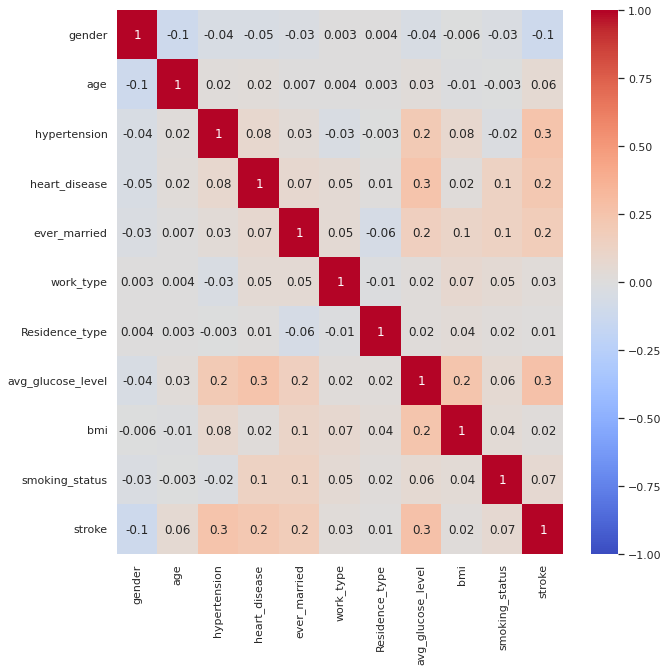

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

There is no correlation higher than +- 0.3 for a pair of features. Therefore, I cannot drop features at this time.

###**3.5 Stroke frequency by categorical and numeric features**

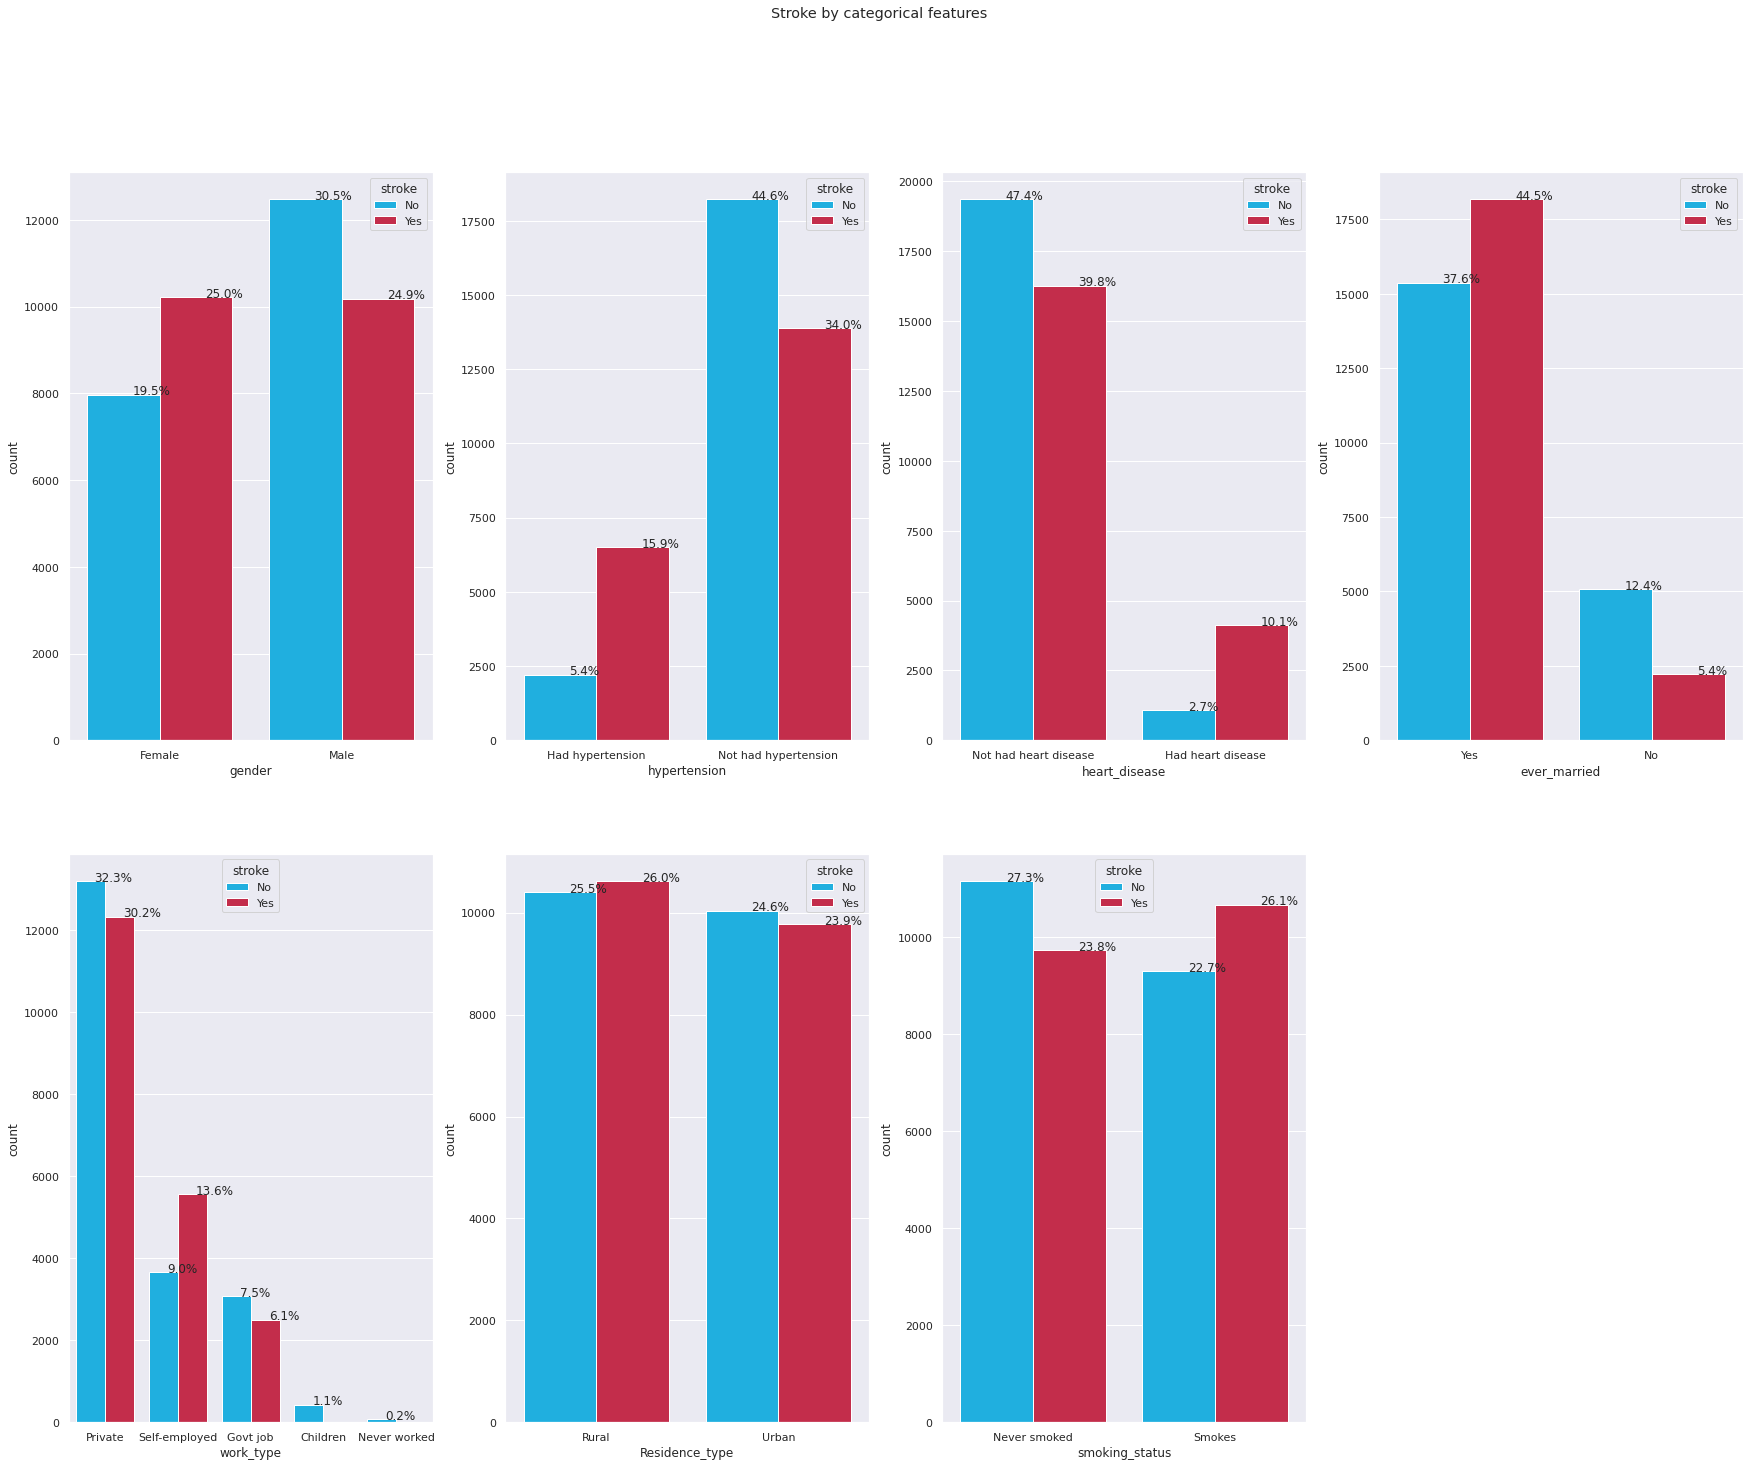

In [ ]:
features = [x for x in data_vis.columns if x not in ['stroke','bmi','age','avg_glucose_level']]
plt.figure(figsize = (30,23))
plt.suptitle('Stroke by categorical features')
#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)
    x = sns.countplot(i[1] ,hue='stroke', data=data_vis, palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))



*   Gender has no effect on stroke.

*   Smoking, hypertension and heart disease increase the risk of stroke.
*   People whose type of work is "self employee" have a higher risk of stroke than other types of work.
* There is no clear connection between residence type and stroke, but there is a slight tendency to stroke in a rural residence type.

In [ ]:
#scale the data before pairplot
data_pairplot = data.copy()
float_columns = [x for x in data.columns if x in ['bmi','age','avg_glucose_level']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,1.327409,1,0,1,4,1,-0.592611,1.286625,0,0
1,1.0,-0.436529,0,0,1,4,0,-0.921346,0.803830,1,0
2,0.0,-0.204432,0,0,1,4,1,-0.772790,-1.858858,1,0
3,1.0,-0.065174,0,1,1,3,0,2.110414,-0.498253,0,0


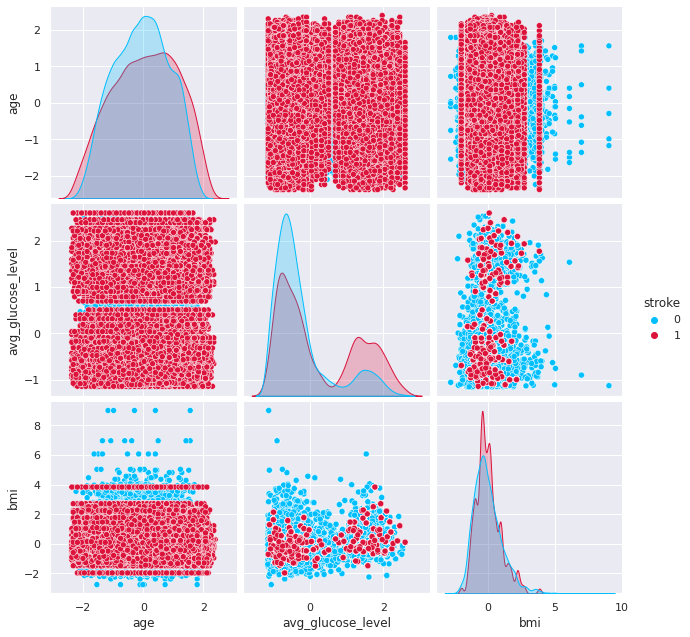

In [ ]:
float_columns = [x for x in data_pairplot.columns if x in ['bmi','age','avg_glucose_level']]
sns.set_context('notebook')
sns.pairplot(data_pairplot[float_columns + ['stroke']], 
             hue='stroke', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});

Combining of float features does not seem to explain stroke.

###**3.6 The effect of combining categorical features on stroke**

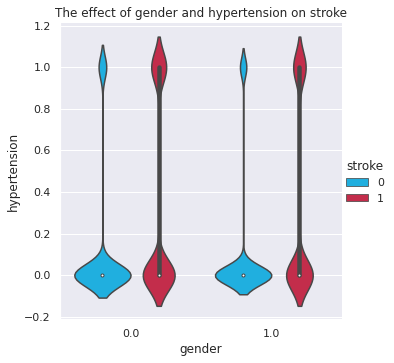

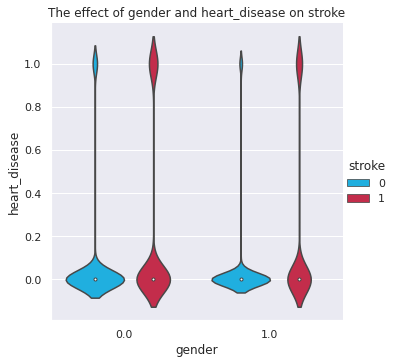

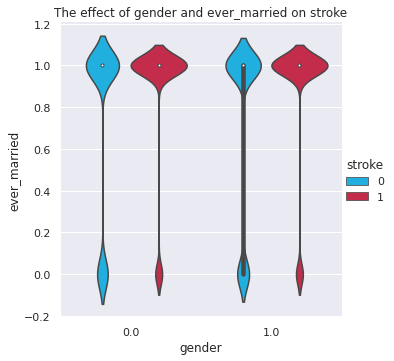

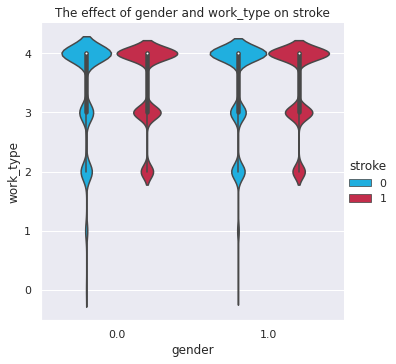

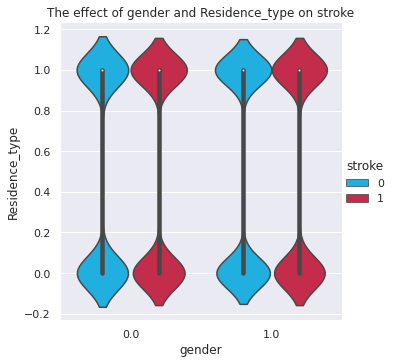

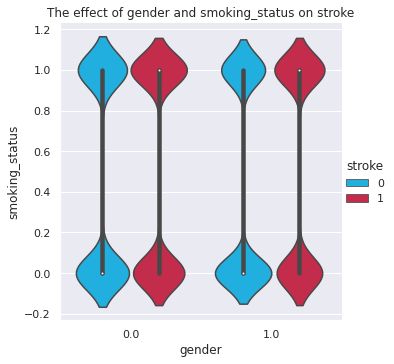

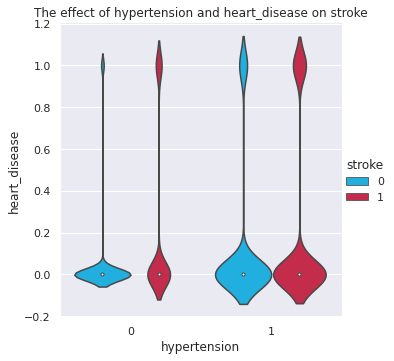

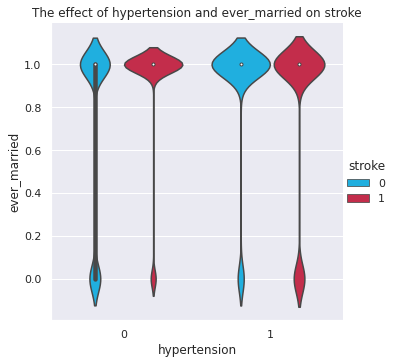

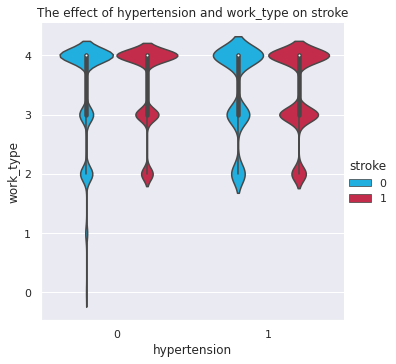

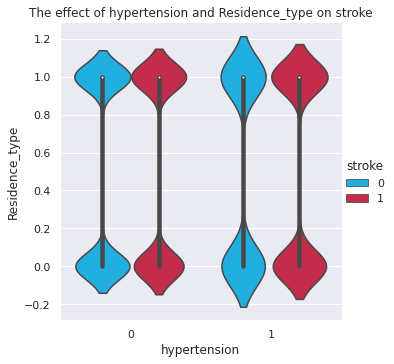

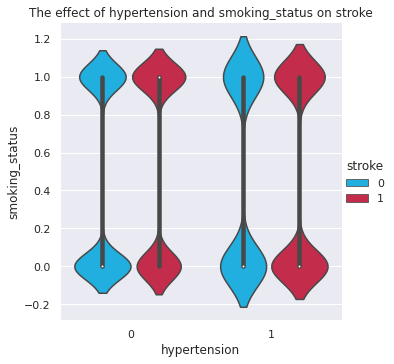

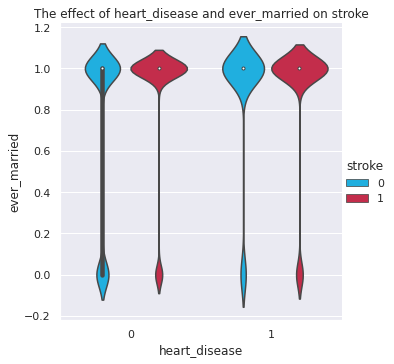

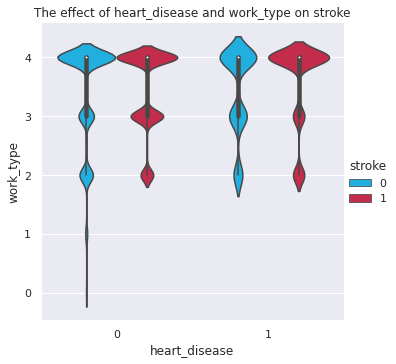

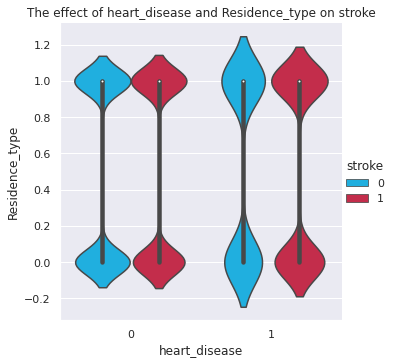

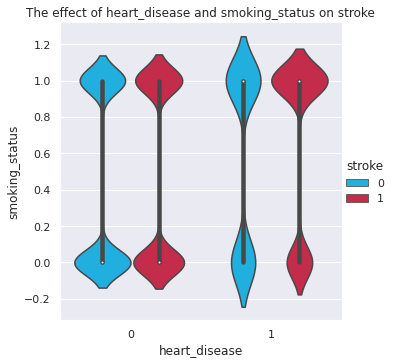

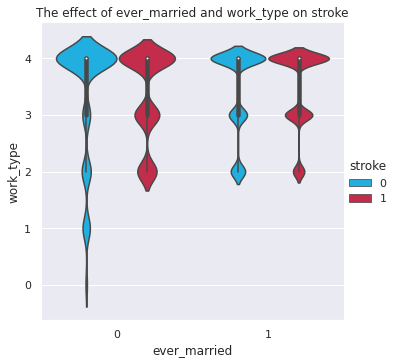

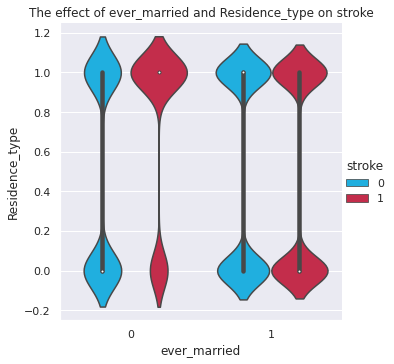

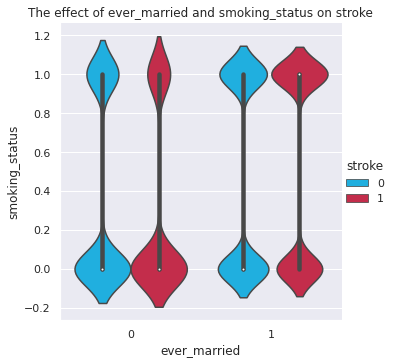

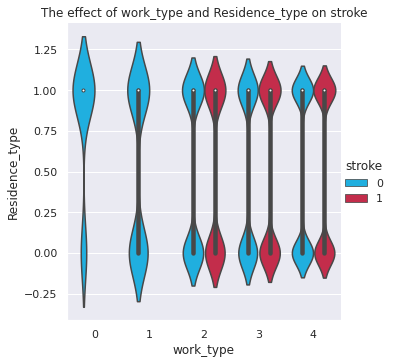

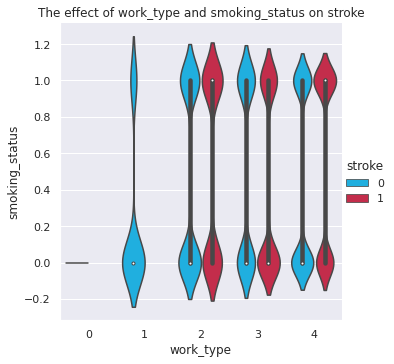

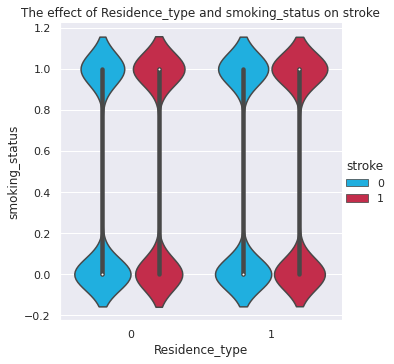

In [ ]:
for i in range (len(features)):
  for x in range (len(features)-i-1):
    sns.catplot(data=data, x=features[i], y=features[i+x+1], hue="stroke", kind="violin",palette = ['deepskyblue','crimson']).set(title="The effect of "+features[i] + " and "+features[i+x+1]+" on stroke")


*   Acording to these graphs, heart disease and smoking both togather increase the risk of stroke.

*   Acording to these graphs, married life and smoking both togather increase the risk of stroke.



###**3.7 Numeric features distributions**

**Bmi**

<Figure size 864x360 with 0 Axes>

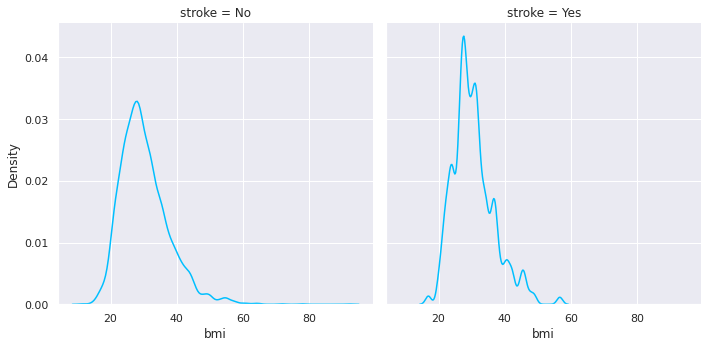

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

Binning the data to see the distribution clearly

In [ ]:
bmi = pd.cut( data_vis['bmi'],bins=[0,18.5,25,30,35,max(data_vis['bmi'])],labels=['Underweight','Normal','Overweight','Obesity','Extremly Obesity'])
bmi_temp = pd.crosstab(data_vis['stroke'],bmi,rownames=['Stroke'])
bmi_temp = bmi_temp.astype(float)
bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,322.0,4612.0,6457.0,4605.0,4454.0
Yes,118.0,3689.0,7280.0,5145.0,4170.0


In [ ]:
bmi_temp_sum_lst=list(bmi_temp.transpose().sum().values)
for idx in range(bmi_temp.values.shape[0]):
    bmi_temp.values[idx]= bmi_temp.values[idx]/bmi_temp_sum_lst[idx]*100

bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,1.574572,22.552567,31.574572,22.518337,21.779951
Yes,0.578375,18.081561,35.682776,25.218116,20.439173


<Figure size 864x1440 with 0 Axes>

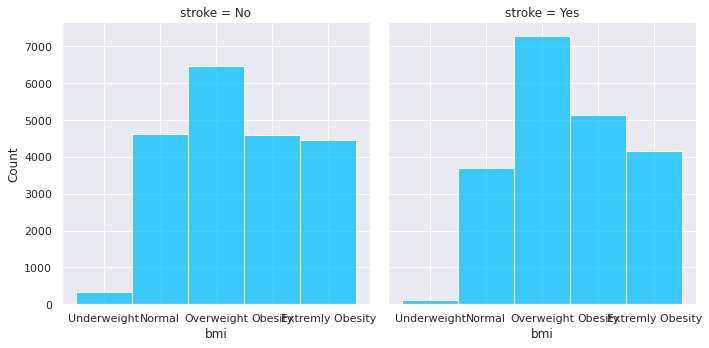

In [ ]:
plt.figure(figsize=(12,20))
sns.displot(data=data_vis,col='stroke',x=bmi,color='deepskyblue');

The bmi's distribution of target column values are similar.

**Age**

<Figure size 864x360 with 0 Axes>

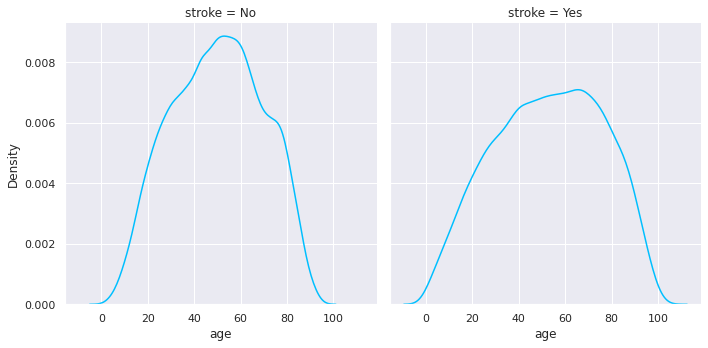

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x='age', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

Binning the data to see the distribution clearly

In [ ]:
age = pd.cut( data_vis['age'],bins=[0,30,45,55,70,max(data_vis['age'])],labels=['0-30','30-45','45-55','55-70','70+'])
age_temp = pd.crosstab(data_vis['stroke'],age,rownames=['Stroke'])
age_temp = age_temp.astype(float)
age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,3883.0,4590.0,3555.0,4790.0,3632.0
Yes,4093.0,3811.0,2797.0,4319.0,5359.0


In [ ]:
age_temp_sum_lst=list(age_temp.transpose().sum().values)
for idx in range(age_temp.values.shape[0]):
    age_temp.values[idx]= age_temp.values[idx]/age_temp_sum_lst[idx]*100

age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,18.987775,22.444988,17.383863,23.422983,17.760391
Yes,20.084401,18.700623,13.724913,21.193385,26.296678


<Figure size 720x432 with 0 Axes>

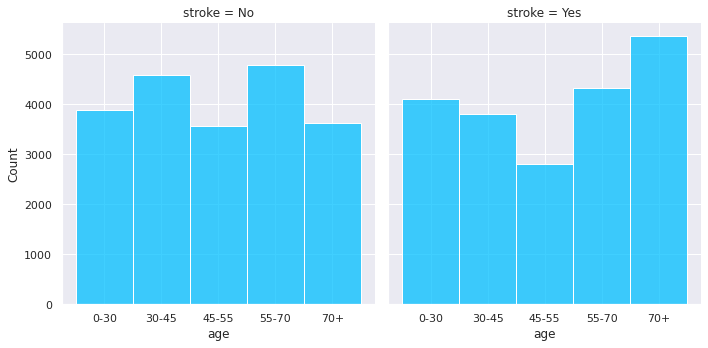

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data=data_vis,col='stroke',x=age,color='deepskyblue');

The age's distribution of target column values are similar.

**avg_glucose_level**

<Figure size 864x360 with 0 Axes>

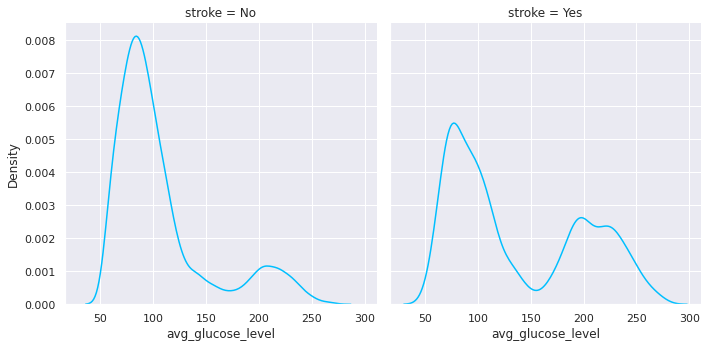

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

Binning the data to see the distribution clearly

In [ ]:
avg_glucose_level = pd.cut( data_vis['avg_glucose_level'],bins=[0,100,125,max(data_vis['avg_glucose_level'])],labels=['normal','impaired glucose','diabetic'])
avg_glucose_level_temp = pd.crosstab(data_vis['stroke'],avg_glucose_level,rownames=['Stroke'])
avg_glucose_level_temp = avg_glucose_level_temp.astype(float)
avg_glucose_level_temp

avg_glucose_level,normal,impaired glucose,diabetic
Stroke,,,
No,12486.0,3871.0,4093.0
Yes,8688.0,2892.0,8822.0


In [ ]:
avg_glucose_level_temp_sum_lst=list(avg_glucose_level_temp.transpose().sum().values)
for idx in range(avg_glucose_level_temp.values.shape[0]):
    avg_glucose_level_temp.values[idx]= avg_glucose_level_temp.values[idx]/avg_glucose_level_temp_sum_lst[idx]*100

avg_glucose_level_temp

avg_glucose_level,normal,impaired glucose,diabetic
Stroke,,,
No,61.056235,18.929095,20.014670
Yes,42.584060,14.175081,43.240859


<Figure size 720x432 with 0 Axes>

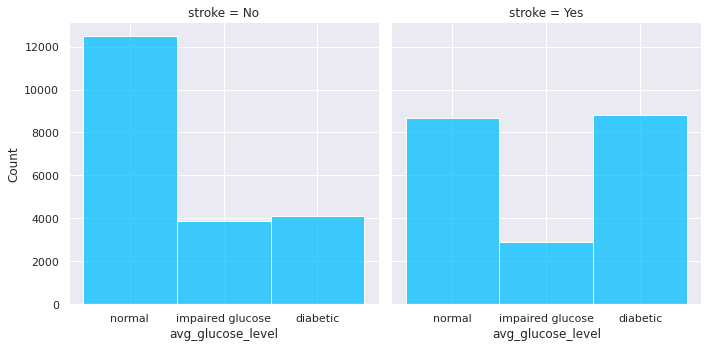

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data=data_vis,col='stroke',x=avg_glucose_level,color='deepskyblue');

The distribution of the average glucose level of the target column values is different. This feature is an explanatory feature; People with high blood glucose are more likely to have a stroke than those with normal values.

###**3.8 Distribution of numeric Features by stroke and medical features**

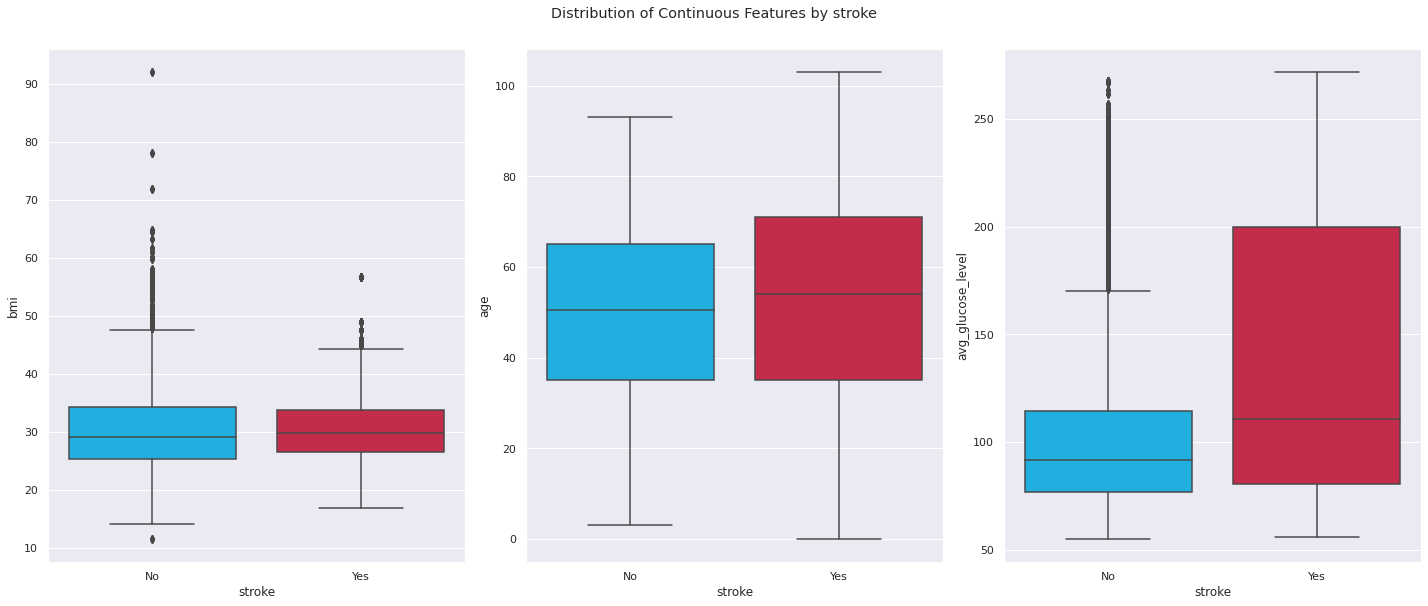

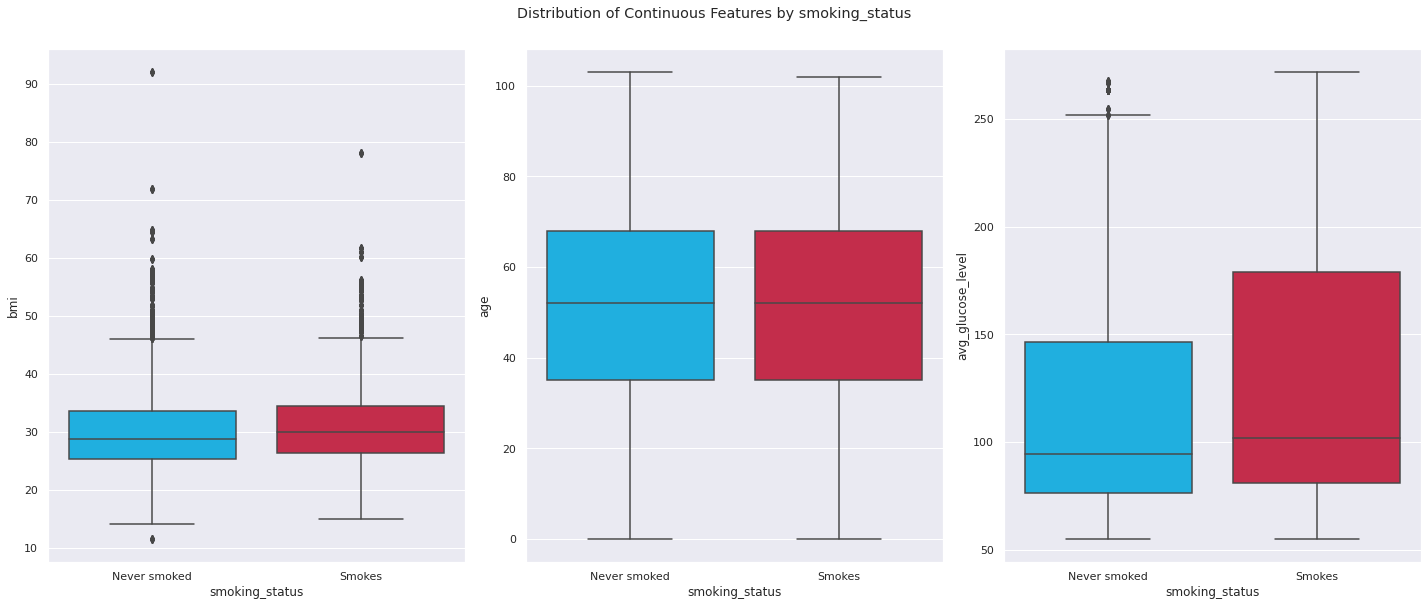

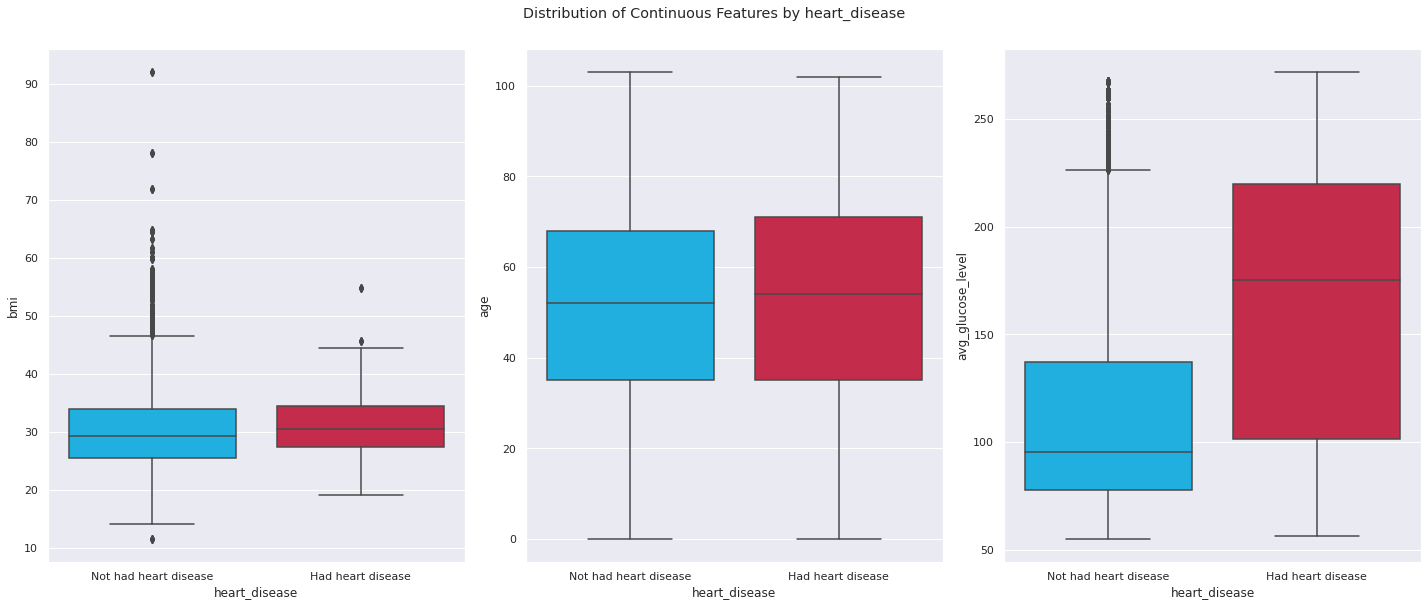

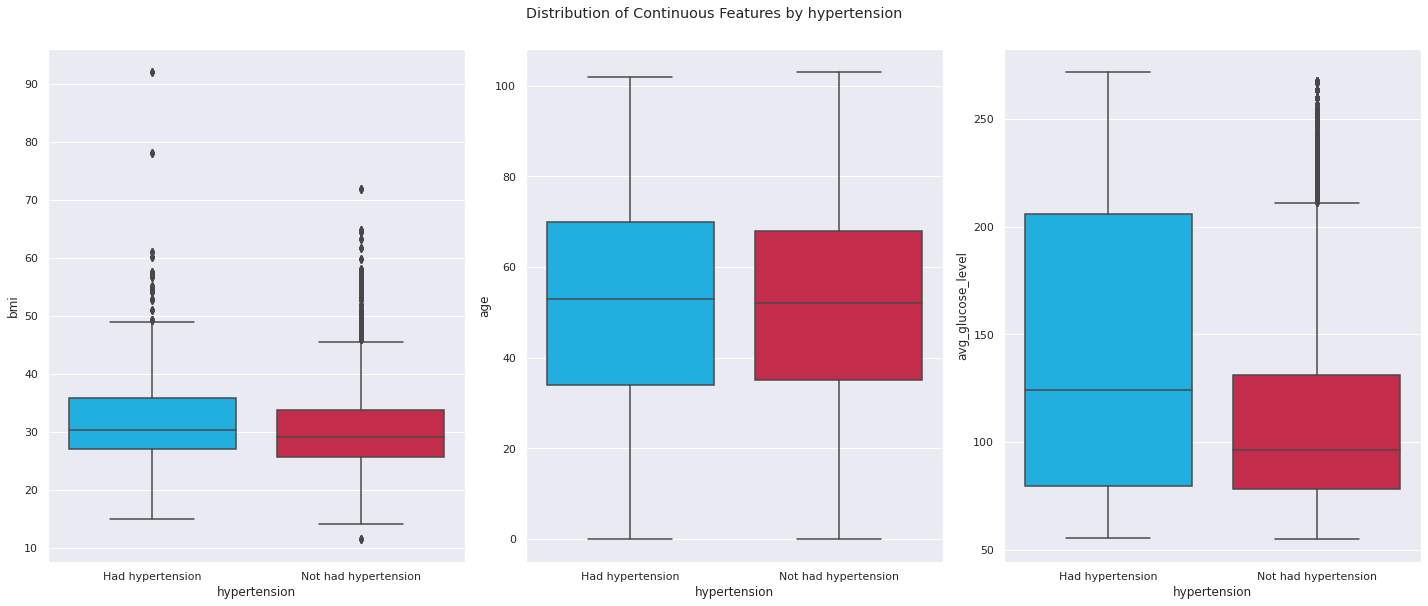

In [ ]:
features = ['stroke','smoking_status','heart_disease','hypertension']
for i in enumerate(features):
  box_cols = ['bmi', 'age', 'avg_glucose_level']
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
  fig.suptitle('Distribution of Continuous Features by '+i[1], y = 1.05);
  for col, ax in zip(box_cols, axes.ravel()):
      sns.boxplot(data=data_vis, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
  plt.tight_layout()

The median, range and values in the "avg_glucose_level" feature is higher when there is a stroke / hypertension / heart_disease.

#**4. Data Preparation 1 - *Without* Features Selection**

In [ ]:
#Loading the data If not run EDA
filepath = '/content/gdrive/MyDrive/ML-Project/stroke.csv'
data = pd.read_csv(filepath)
data["gender"].fillna(0, inplace = True) #fill 0 instead NA in the gender column
data = data.drop(data[data.age < 0].index) #drop rows with negative age

###**4.1 Values with low frequency**

Let's look at the "work_type" feature graph:

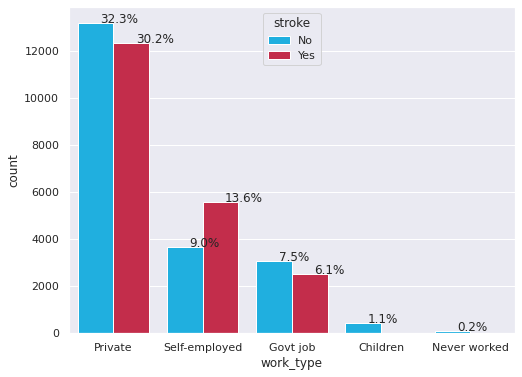

In [ ]:
plt.figure(figsize=(8,6))
x = sns.countplot("work_type" ,hue='stroke', data=data_vis, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))


Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

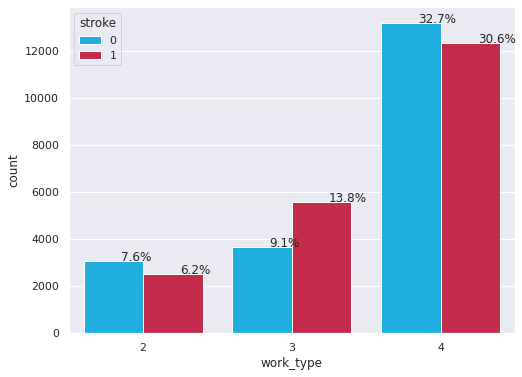

In [ ]:
data.drop(data[data.work_type <= 1].index, inplace=True)
plt.figure(figsize=(8,6))
x = sns.countplot("work_type" ,hue='stroke', data=data, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be activated here.

In [ ]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,0.0,80,1,0,1,1,87.96,39.2,0,0,0,1,0
1,1.0,42,0,0,1,0,69.04,35.9,1,0,0,1,0
2,0.0,47,0,0,1,1,77.59,17.7,1,0,0,1,0
3,1.0,50,0,1,1,0,243.53,27.0,0,0,0,0,1
4,1.0,42,0,0,1,0,77.67,32.3,1,0,0,1,0


###**4.2 Skewness Checking**

In [ ]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
avg_glucose_level,0.935672,True
bmi,1.100130,True


There are 2 columns with high Skewness.
Therefore, we will normalize them using the QuantileTransformer method.

In [ ]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])
data[['avg_glucose_level']] = qt.fit_transform(data[['avg_glucose_level']])

In [ ]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
avg_glucose_level,0.270389,False
bmi,-0.006902,False


Now, the columns are not skewed.

###**4.3 Data Scaling**

The StandardScaler method was chosen because the shape of the distribution of these features.

In [ ]:
sc = StandardScaler()
data[['bmi']] = sc.fit_transform(data[['bmi']])
data[['age']] = sc.fit_transform(data[['age']])
data[['avg_glucose_level']] = sc.fit_transform(data[['avg_glucose_level']])
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,0.0,1.325606,1,0,1,1,-0.329472,1.252525,0,0,0,1,0
1,1.0,-0.436881,0,0,1,0,-1.192634,0.895216,1,0,0,1,0
2,0.0,-0.204975,0,0,1,1,-0.719058,-2.494703,1,0,0,1,0
3,1.0,-0.065831,0,1,1,0,1.853670,-0.471326,0,0,0,0,1
4,1.0,-0.436881,0,0,1,0,-0.716495,0.466054,1,0,0,1,0


In [ ]:
(data[['bmi','age','avg_glucose_level']]).describe()

,bmi,age,avg_glucose_level
count,4.033600e+04,4.033600e+04,4.033600e+04
mean,-7.398551e-18,2.254796e-17,2.254796e-17
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-5.198954e+00,-2.384894e+00,-5.071404e+00
25%,-6.664324e-01,-7.615501e-01,-6.625227e-01
50%,5.190608e-03,2.693116e-02,-3.449643e-03
75%,6.762066e-01,7.690312e-01,6.527686e-01
max,5.199289e+00,2.392375e+00,5.059610e+00


###**4.4 Data Splitting**

The classes are balanced so there is no reason use StratifiedShuffleSplit

In [ ]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.504829

0    0.495171

Name: stroke, dtype: float64

1    0.507776

0    0.492224

Name: stroke, dtype: float64


#**5. ML - Models 1**

###**5.1 K Nearest Neighbors**

Search for the best model parameters with GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.931 total time=   0.1s

[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.934 total time=   0.1s

[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.932 total time=   0.2s

[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.928 total time=   0.1s

[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.934 total time=   0.2s

[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.931 total time=   0.3s

[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.934 total time=   0.3s

[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.932 total time=   0.3s

[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.928 total time=   0.3s

[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.934 total time=   0.3s

[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.906 total time=   0.2s

[CV 2/5] END ...n_neighbors=3, weig

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

Get the best parameters.

In [ ]:
print(gridKNN.best_params_)

{'n_neighbors': 1, 'weights': 'distance'}


1NN is the best parameter for prediction. There will probably be an overfitting here.


Prediction according to this model.

In [ ]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

Overfitting checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.9435804973330328


As expected, there is high overfitting. At the same time, the accuracy is also high in Test.

The model metrics:

**The model predicts strokes with a high accuracy of 94.3%.**

In [ ]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [ ]:
results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914


**The most important metric is Recall (in this business problem):
Recall = Of all real positive cases, how many are predicted positive.
The recall in this model - 98.5%.**

Confusion Matrix

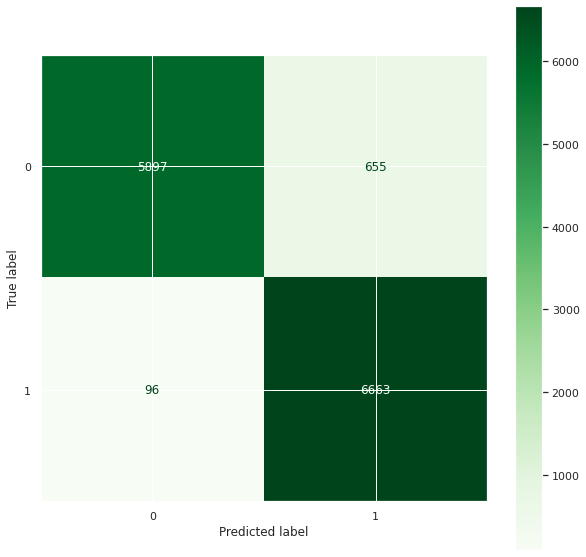

In [ ]:
plot_confusion_matrix(gridKNN,X_test,y_test,cmap = "Greens")

###**5.2 Logistic Regression**

Building a simple logistic regression model.

In [ ]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.676854764107308

0.6837202313875742


Low score. Building a model with regularization.

In [ ]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):

  # defining parameter range
  param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
  gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
  gridLG.fit(X_train, y_train)

No GPU, using /device:CPU:0.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.679 total time=   0.4s

[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.681 total time=   0.4s

[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.664 total time=   0.4s

[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.676 total time=   0.4s

[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.684 total time=   0.4s

[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.679 total time=   0.8s

[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.681 total time=   0.8s

[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.664 total time=   0.8s

[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.676 total time=   0.8s

[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.684 total time=   0.8s

[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear

Get the best parameters.

In [ ]:
print(gridLG.best_params_)

{'Cs': 10, 'cv': 4, 'penalty': 'l2', 'solver': 'saga'}


Prediction according to this model.

In [ ]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)

Overfitting checking:

In [ ]:

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6788899167437558

0.6833446022086995


There is no overfitting, but the model results are poor.

**The model predicts strokes with a low accuracy of 68.3%.**

The model metrics:

In [ ]:
resultsLG = train_evaluate_model(y_test)
resultsLG.index = ['Logistic Regression - Method 1']
results = results.append(resultsLG)

In [ ]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991


Confusion Matrix

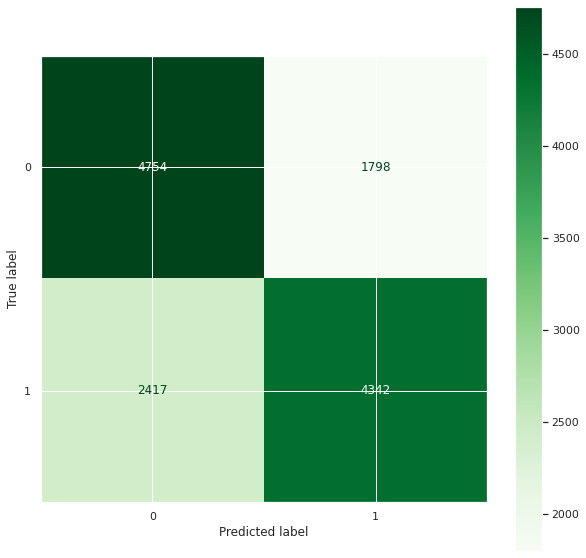

In [ ]:
plot_confusion_matrix(gridLG,X_test,y_test,cmap = "Greens")

###**5.3 Naive Bayes**

I will test the algorithm with the two methods that fit the data: Gaussian and Bernoulli.

In [ ]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6603885722829557, 'bernoulli': 0.6631635682917218}

The effectiveness of the methods is similar. The prediction results are not good.

In [ ]:
# fitting the model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Prediction according to this model.

In [ ]:
y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6606475485661425

0.6631357523852452


There is no overfitting, but the model results are poor.

The model metrics:

**The model predicts strokes with a low accuracy of 66.2%.**

In [ ]:
resultsNB = train_evaluate_model(y_test)
resultsNB.index = ['Naive Bayes - Method 1']
results = results.append(resultsNB)

In [ ]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083


Confusion Matrix

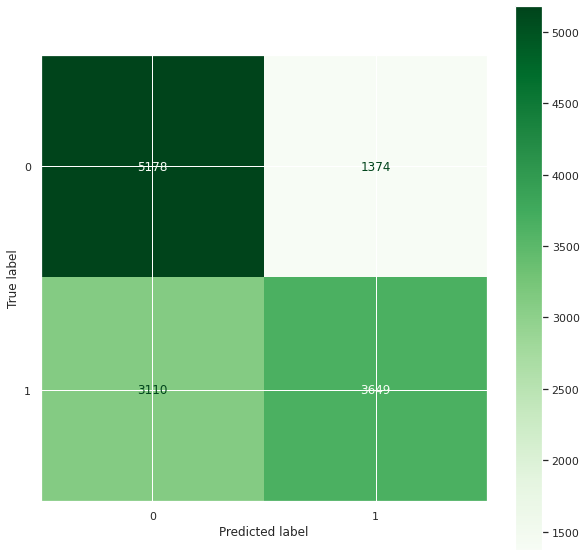

In [ ]:
plot_confusion_matrix(GNB,X_test,y_test,cmap = "Greens")

###**5.4 Support Vector Machine**

Search for the best model parameters with GridSearchCV.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):
  param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
  gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
  gridSVM.fit(X_train, y_train)

No GPU, using /device:CPU:0.

Fitting 2 folds for each of 16 candidates, totalling 32 fits

[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.846 total time=  14.0s

[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.847 total time=  14.6s

[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.736 total time=  13.5s

[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.737 total time=  13.5s

[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.671 total time=  14.6s

[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.679 total time=  14.7s

[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.672 total time=  16.5s

[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.672 total time=  16.5s

[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.888 total time=  15.8s

[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.889 total time=  17.9s

[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.777 total time=  16.6s

[CV 2/

Get the best parameters.

In [ ]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


Prediction according to this model.

In [ ]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

Overfitting checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9798704902867715

0.9539478626699722


There is low overfitting, but the model results are good.

**The model predicts strokes with a high accuracy of 95.3%.**

Model metrics:

In [ ]:
resultsSVM = train_evaluate_model(y_test)
resultsSVM.index = ['Support Vector Machine - Method 1']
results = results.append(resultsSVM)

In [ ]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379


Confusion Matrix

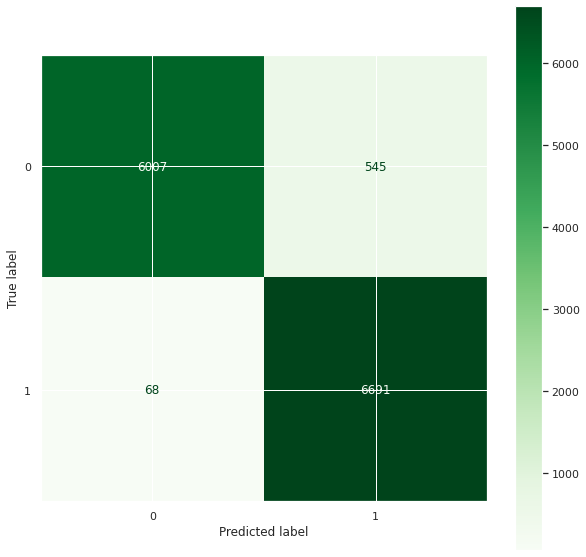

In [ ]:
plot_confusion_matrix(gridSVM,X_test,y_test,cmap = "Greens")

###**5.5 Decision Tree**

Building a model without restrictions.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

Building a model with restrictions - Search for the best model parameters with GridSearchCV.

In [ ]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 25, 2),
                         'max_features': range(1, 13)})

Get the best parameters.

In [ ]:
print(gridDT.best_params_)

{'max_depth': 23, 'max_features': 11}


Prediction according to this model.

In [ ]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9999629972247919

0.9987228607918263


There is no overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.8%.**

Model metrics:

In [ ]:
resultsDT = train_evaluate_model(y_test)
resultsDT.index = ['Decision Trees - Method 1']
results = results.append(resultsDT)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705


Confusion Matrix

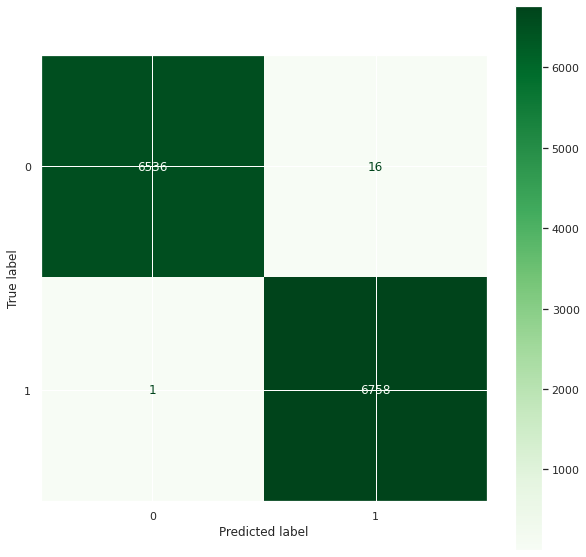

In [ ]:
plot_confusion_matrix(gridDT,X_test,y_test,cmap = "Greens")

###**5.6 Random Forest**

Search for the best model parameters with GridSearchCV.

In [ ]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [ ]:
print(gridRF.best_params_)

{'n_estimators': 400}


Prediction according to this model.

In [ ]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.9975959732552024


There is no overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.8%.**

**The most important metric - RECALL - is PERFECT. No stroke patient will be missed.**

Model metrics:

In [ ]:
resultsRF = train_evaluate_model(y_test)
resultsRF.index = ['Random Forest - Method 1']
results = results.append(resultsRF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558


Confusion Matrix

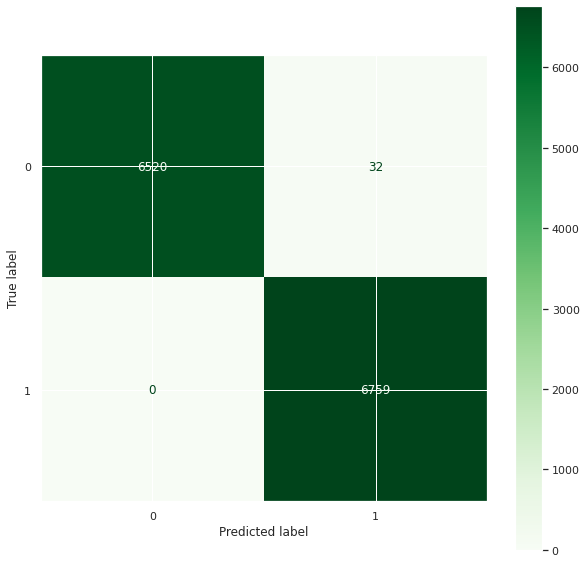

In [ ]:
plot_confusion_matrix(gridRF,X_test,y_test,cmap = "Greens")

###**5.7 Extra Trees**

Search for the best model parameters with GridSearchCV.

In [ ]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [ ]:
print(gridEF.best_params_)

{'n_estimators': 400}


Prediction according to this model.

In [ ]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.993238674780257


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.3%.**

Model metrics:

In [ ]:
resultsEF = train_evaluate_model(y_test)
resultsEF.index = ['Extra Trees - Method 1']
results = results.append(resultsEF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134


Confusion Matrix

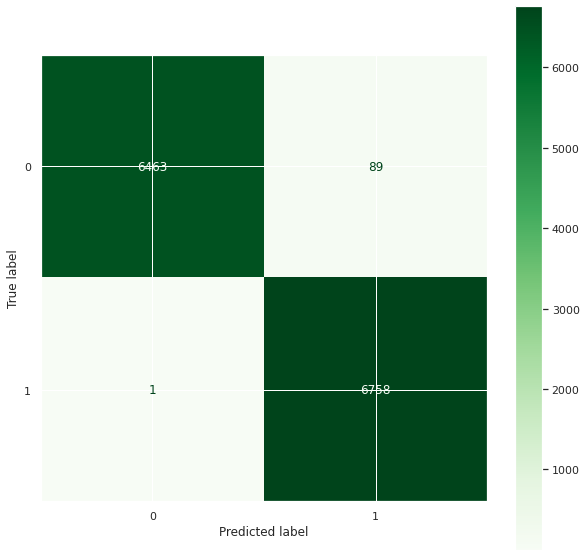

In [ ]:
plot_confusion_matrix(gridEF,X_test,y_test,cmap = "Greens")

###**5.8 Gradient Boosting**

Search for the best model parameters with GridSearchCV.

In [ ]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=4,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [ ]:
print(gridGB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


Prediction according to this model.

In [ ]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9827937095282147

0.978514010968372


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.6%.**

Model metrics:

In [ ]:
resultsGB = train_evaluate_model(y_test)
resultsGB.index = ['Gradient Boosting - Method 1']
results = results.append(resultsGB)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427


Confusion Matrix

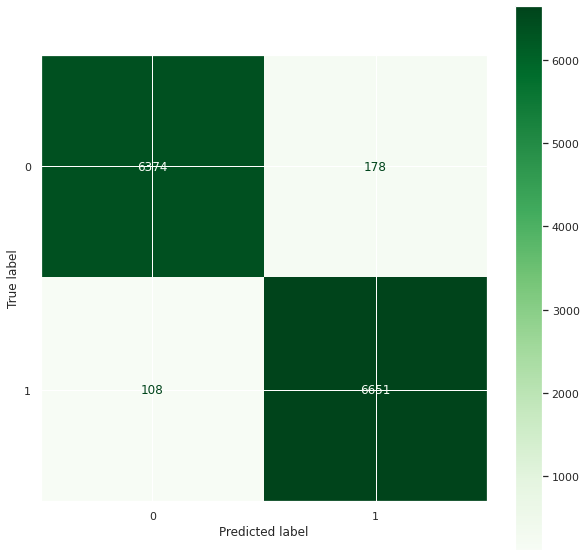

In [ ]:
plot_confusion_matrix(gridGB,X_test,y_test,cmap = "Greens")

###**5.9 Ada Boost**

Search for the best model parameters with GridSearchCV.

In [ ]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [ ]:
print(gridAB.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


Prediction according to this model.

In [ ]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.9903087671850349


There is low overfitting, the model results are very good.

**The model predicts strokes with a high accuracy of 98.4%.**

Model metrics:

In [ ]:
resultsAB = train_evaluate_model(y_test)
resultsAB.index = ['Ada Boost - Method 1']
results = results.append(resultsAB)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247


Confusion Matrix

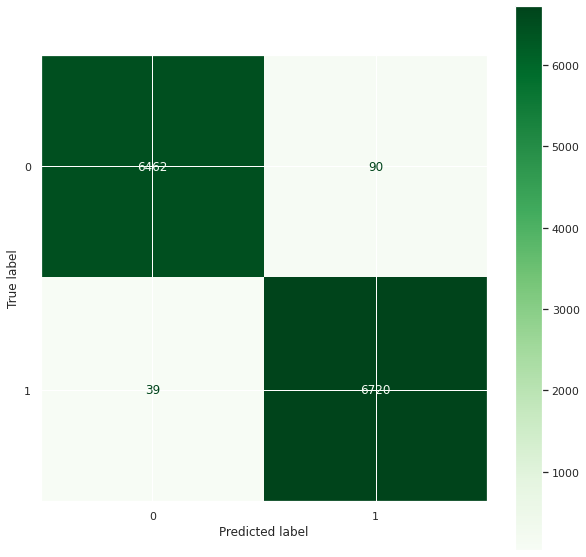

In [ ]:
plot_confusion_matrix(gridAB,X_test,y_test,cmap = "Greens")

###**5.10 Stacking Voting**

Search for the best model parameters with GridSearchCV.
I chose as estimators the two algorithms with the highest accuracy.

In [ ]:
# The combined model--Decision Trees and Random Forest
estimators = [('Decision Trees', gridDT), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

Prediction according to this model.

In [ ]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.9987979866276012


There is no overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.8%.**

Model metrics:

In [ ]:
resultsVC = train_evaluate_model(y_test)
resultsVC.index = ['Stacking Voting - Method 1']
results = results.append(resultsVC)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

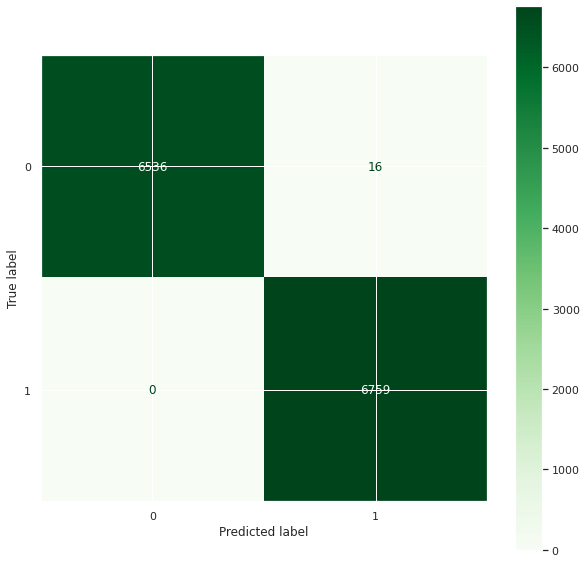

In [ ]:
plot_confusion_matrix(VC,X_test,y_test,cmap = "Greens")

#**6. Data Preparation 2 - *With* Features Selection**

###**6.1 General Preparations**

In [ ]:
#Loading the data If not run EDA
filepath = '/content/gdrive/MyDrive/ML-Project/stroke.csv'
data = pd.read_csv(filepath)
data["gender"].fillna(0, inplace = True) #fill 1 instead NA in the gender column
data = data.drop(data[data.age < 0].index) #drop rows with negative age

###**6.2 Values with low frequency**

Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

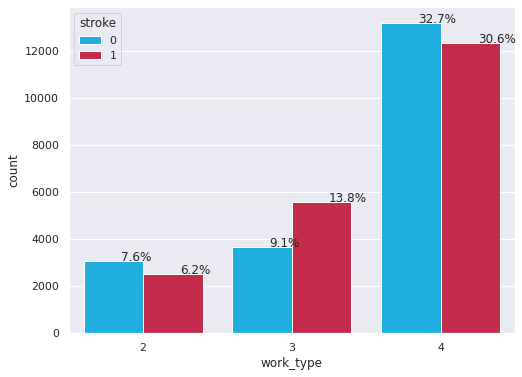

In [ ]:
data.drop(data[data.work_type <= 1].index, inplace=True)
plt.figure(figsize=(8,6))
x = sns.countplot("work_type" ,hue='stroke', data=data, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be activated here.

In [ ]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,0.0,80,1,0,1,1,87.96,39.2,0,0,0,1,0
1,1.0,42,0,0,1,0,69.04,35.9,1,0,0,1,0
2,0.0,47,0,0,1,1,77.59,17.7,1,0,0,1,0
3,1.0,50,0,1,1,0,243.53,27.0,0,0,0,0,1
4,1.0,42,0,0,1,0,77.67,32.3,1,0,0,1,0


Scaling the data for features selection. Now I use the MinMaxScaler method.

In [ ]:
mms = MinMaxScaler()
data[['bmi']] = mms.fit_transform(data[['bmi']])
data[['age']] = mms.fit_transform(data[['age']])
data[['avg_glucose_level']] = mms.fit_transform(data[['avg_glucose_level']])
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,0.0,0.776699,1,0,1,1,0.151602,0.344099,0,0,0,1,0
1,1.0,0.407767,0,0,1,0,0.064260,0.303106,1,0,0,1,0
2,0.0,0.456311,0,0,1,1,0.103730,0.077019,1,0,0,1,0
3,1.0,0.485437,0,1,1,0,0.869772,0.192547,0,0,0,0,1
4,1.0,0.407767,0,0,1,0,0.104099,0.258385,1,0,0,1,0


In [ ]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"

###**6.3 Features Selection**

In this method, I will test several methodologies for features selection for the model. I will analyze the results and build a new DF based on the most influential features to predict stroke.

*Method 1*

[0.01125314 0.03727616 0.0641629  0.04751695 0.0388409  0.04295069

 0.37858532 0.30495862 0.0342161  0.00963224 0.01295198 0.01765499]


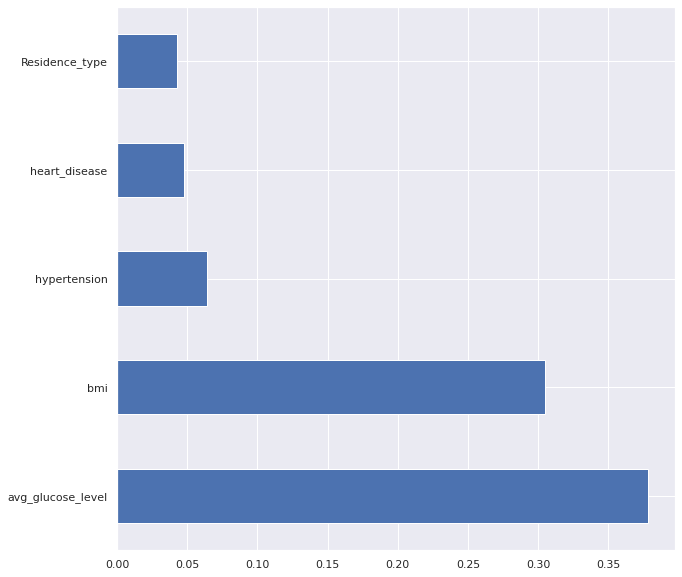

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

According to this graph, the 5 most influential features are:


1.   avg_glucose_level
2.   bmi
3.   hypertension
4.   heart_disease
5.   Residence_type



*Method 2*

In [ ]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                      Specs        Score

2              hypertension  2014.129903

3             heart_disease  1713.612125

6         avg_glucose_level   641.174415

11  work_type_Self-employed   351.338984

0                    gender   234.286137


According to this graph, the 5 most influential features are:


1.   hypertension
2.   heart_disease
3.   avg_glucose_level
4.   work_type_Self-employed
5.   gender



*Method 3*

In [ ]:
#Create a logistic regression classifier
lr = LogisticRegression()
# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=5,      # The maximum number of features to consider is 5
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=4)                # The number of cross-validations to perform is 4

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Features: 1585/1585

Best accuracy score: 0.68

Best subset (indices): (2, 3, 4, 6, 11)

Best subset (corresponding names): ('hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type_Self-employed')


According to this graph, the 5 most influential features are:


1.   hypertension
2.   heart_disease
3.   ever_married
4.   avg_glucose_level
5.   work_type_Self-employed



**A feature that appears twice in the results, as one of the 5 most influential will be in the model. If a feature was ranked in one of the first three places (according to one of the methods) and was not included in the model, it will also be included.** 


---


**The features were chosen after considering the EDA chapter..**



---

*The features in the new model are:*

1.   *hypertension*
2.   *heart_disease*
3.   *ever_married*
4.   *avg_glucose_level*
5.   *work_type_Self-employed*
6.   *bmi*




###**6.4 Skewness Checking**

In [ ]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
avg_glucose_level,0.935672,True
bmi,1.100130,True


There are 2 columns with high Skewness.
Therefore, we will normalize them using the QuantileTransformer method.

In [ ]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])
data[['avg_glucose_level']] = qt.fit_transform(data[['avg_glucose_level']])

In [ ]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
avg_glucose_level,0.270389,False
bmi,-0.006902,False


Now, the columns are not skewed.

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.504829

0    0.495171

Name: stroke, dtype: float64

1    0.507776

0    0.492224

Name: stroke, dtype: float64


###**6.5 Data Splitting**

The classes are balanced so there is no reason use StratifiedShuffleSplit.


In [ ]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X =  X[['hypertension', 'heart_disease', 'avg_glucose_level', 'work_type_Self-employed', 'ever_married', 'bmi']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#**7. ML - Models 2**

###**7.1 K Nearest Neighbors**

Search for the best model parameters with GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.998 total time=   0.2s

[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.999 total time=   0.2s

[CV 3/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.1s

[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.998 total time=   0.1s

[CV 5/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.1s

[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.998 total time=   0.2s

[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.999 total time=   0.2s

[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.2s

[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.998 total time=   0.2s

[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.2s

[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.998 total time=   0.1s

[CV 2/5] END ...n_neighbors=3, weig

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

Get the best parameters.

In [ ]:
print(gridKNN.best_params_)

{'n_neighbors': 1, 'weights': 'distance'}


1NN is the best parameter for prediction. There will probably be an overfitting here.


Prediction according to this model.

In [ ]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

Overfitting checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

1.0


there is NO overfitting.The model predict Stroke PERFECTLY.

**The model predicts strokes perfectly with 100% success in all metrics.**

The model metrics:

In [ ]:
resultsKNN2 = train_evaluate_model(y_test)
resultsKNN2.index = ['K Nearest Neighbors - Method 2']
results = results.append(resultsKNN2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

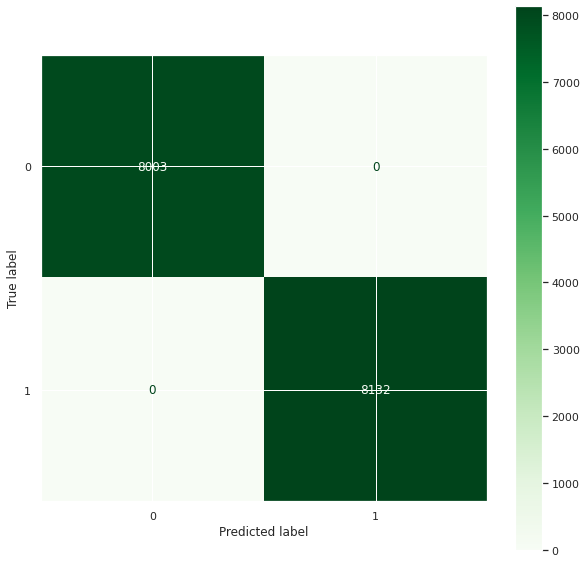

In [ ]:
plot_confusion_matrix(gridKNN,X_test,y_test,cmap = "Greens")

**Not a single stroke was missed among about 16,000 people.**

###**7.2 Logistic Regression**

Building a simple logistic regression model.

In [ ]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.665303086649312

0.6686086148125193


Low score. Building a model with regularization.

In [ ]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):

  # defining parameter range
  param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
  gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
  gridLG.fit(X_train, y_train)

No GPU, using /device:CPU:0.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.666 total time=   0.3s

[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.669 total time=   0.3s

[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.660 total time=   0.3s

[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.659 total time=   0.3s

[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.681 total time=   0.3s

[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.666 total time=   0.5s

[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.669 total time=   0.4s

[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.660 total time=   0.5s

[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.659 total time=   0.5s

[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.681 total time=   0.5s

[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear

Get the best parameters.

In [ ]:
print(gridLG.best_params_)

{'Cs': 20, 'cv': 4, 'penalty': 'l2', 'solver': 'saga'}


Prediction according to this model.

In [ ]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)

Overfitting checking:

In [ ]:

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6848064129581423

0.6871397582894329


There is no overfitting, but the model results are poor.

**The model predicts strokes with a low accuracy of 68.7%.**

The model metrics:

In [ ]:
resultsLG2 = train_evaluate_model(y_test)
resultsLG2.index = ['Logistic Regression - Method 2']
results = results.append(resultsLG2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

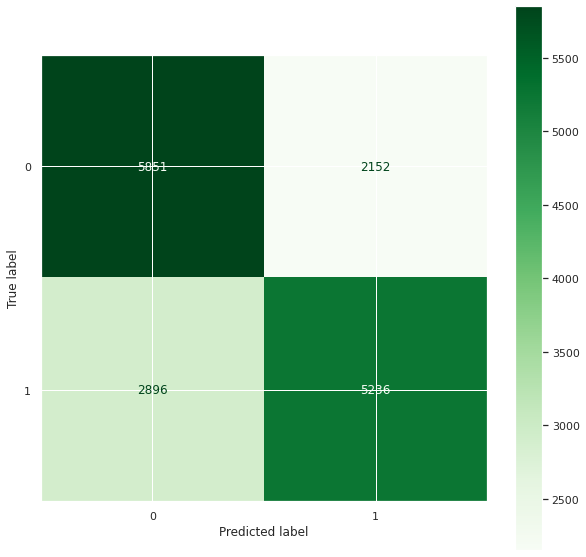

In [ ]:
plot_confusion_matrix(gridLG,X_test,y_test,cmap = "Greens")

**In method 2 as in method 1, logistic regression is not a good model for predicting stroke.**

###**7.3 Naive Bayes**

I will test the algorithm with the two methods that fit the data: Gaussian and Bernoulli.

In [ ]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.650015088362503, 'bernoulli': 0.6661295277888721}

The effectiveness of the methods is similar. The prediction results are not good.

In [ ]:
# fitting the model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Prediction according to this model.

In [ ]:
y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6508821949506218

0.6494577006507593


There is no overfitting, but the model results are poor.

The model metrics:

**The model predicts strokes with a low accuracy of 64.9%.**

In [ ]:
resultsNB2 = train_evaluate_model(y_test)
resultsNB2.index = ['Naive Bayes - Method 2']
results = results.append(resultsNB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

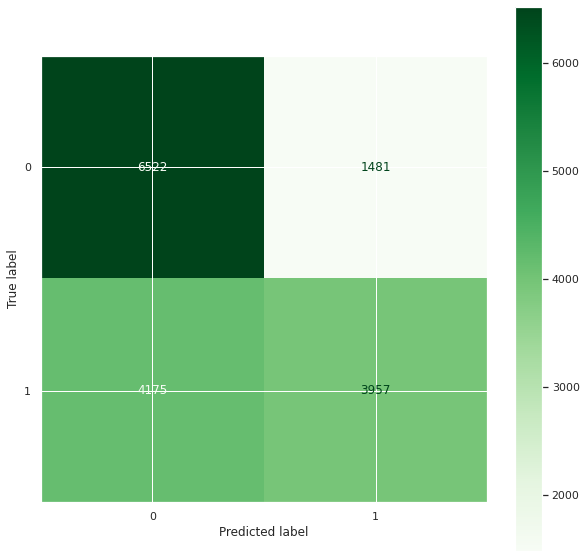

In [ ]:
plot_confusion_matrix(GNB,X_test,y_test,cmap = "Greens")

**In method 2 as in method 1, Naive Bayes is not a good model for predicting stroke.**

###**7.4 Support Vector Machine**

Search for the best model parameters with GridSearchCV.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):
  param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
  gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
  gridSVM.fit(X_train, y_train)

No GPU, using /device:CPU:0.

Fitting 2 folds for each of 16 candidates, totalling 32 fits

[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.765 total time=   9.1s

[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.772 total time=   8.7s

[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.689 total time=  10.5s

[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.691 total time=  10.5s

[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.646 total time=  11.0s

[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.655 total time=  10.6s

[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.656 total time=  11.7s

[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.659 total time=  11.4s

[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.796 total time=   9.8s

[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.798 total time=   9.5s

[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.707 total time=  12.0s

[CV 2/

Get the best parameters.

In [ ]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


Prediction according to this model.

In [ ]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

Overfitting checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8815751415230776

0.8855283545088317


There no overfitting, but the model results are not bad.

**The model predicts stroke with an accuracy of 88.6%.**

Model metrics:

In [ ]:
resultsSVM2 = train_evaluate_model(y_test)
resultsSVM2.index = ['Support Vector Machine - Method 2']
results = results.append(resultsSVM2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

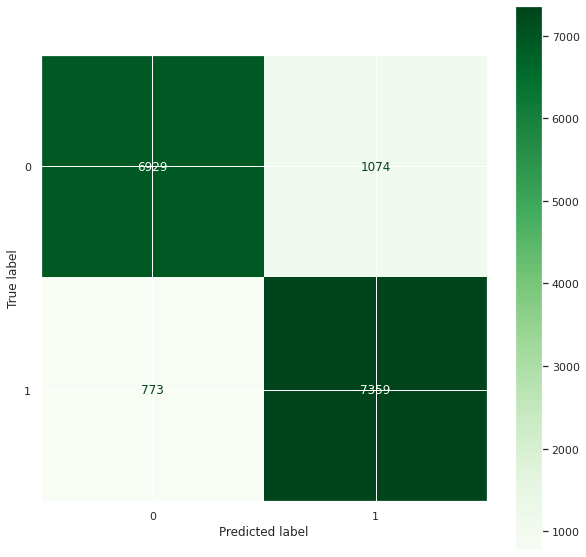

In [ ]:
plot_confusion_matrix(gridSVM,X_test,y_test,cmap = "Greens")

**In method 2 unlike method 1, Support Vector Machine is not such a good model for stroke prediction.**

###**7.5 Decision Tree**

Building a model without restrictions.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

Building a model with restrictions - Search for the best model parameters with GridSearchCV.

In [ ]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 25, 2),
                         'max_features': range(1, 7)})

Get the best parameters.

In [ ]:
print(gridDT.best_params_)

{'max_depth': 23, 'max_features': 4}


Prediction according to this model.

In [ ]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9993388702946159

0.999442206383638


There is no overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.9%.**

Model metrics:

In [ ]:
resultsDT2 = train_evaluate_model(y_test)
resultsDT2.index = ['Decision Trees - Method 2']
results = results.append(resultsDT2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

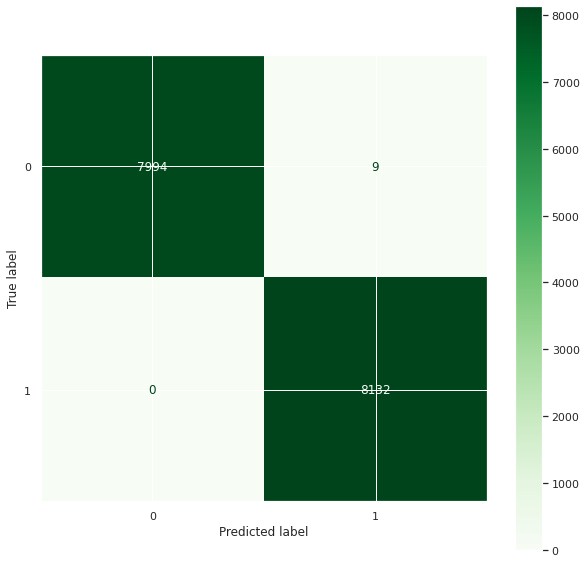

In [ ]:
plot_confusion_matrix(gridDT,X_test,y_test,cmap = "Greens")

###**7.6 Random Forest**

Search for the best model parameters with GridSearchCV.

In [ ]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [ ]:
print(gridRF.best_params_)

{'n_estimators': 30}


Prediction according to this model.

In [ ]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

1.0


There is no overfitting, the model results are excellent.

**The model predicts strokes with a perfect accuracy of 100%.**

**The most important metric - RECALL - is PERFECT. No stroke patient will be missed.**

Model metrics:

In [ ]:
resultsRF2 = train_evaluate_model(y_test)
resultsRF2.index = ['Random Forest - Method 2']
results = results.append(resultsRF2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

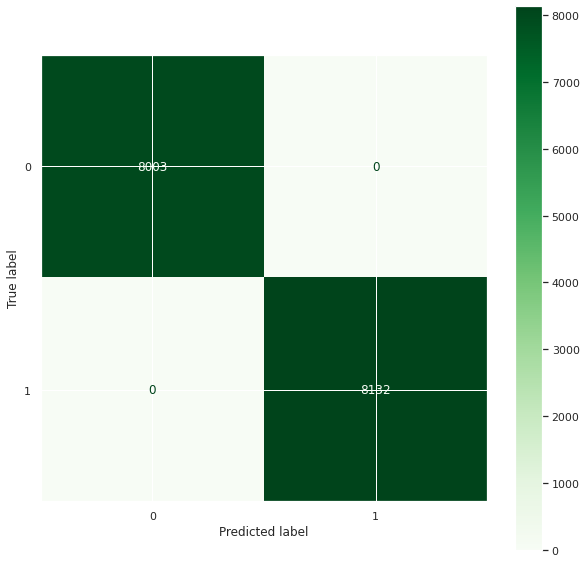

In [ ]:
plot_confusion_matrix(gridRF,X_test,y_test,cmap = "Greens")

###**7.7 Extra Trees**

Search for the best model parameters with GridSearchCV.

In [ ]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [ ]:
print(gridEF.best_params_)

{'n_estimators': 30}


Prediction according to this model.

In [ ]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

1.0


**Here too, the model predicts a stroke perfectly.**

Model metrics:

In [ ]:
resultsEF2 = train_evaluate_model(y_test)
resultsEF2.index = ['Extra Trees - Method 2']
results = results.append(resultsEF2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

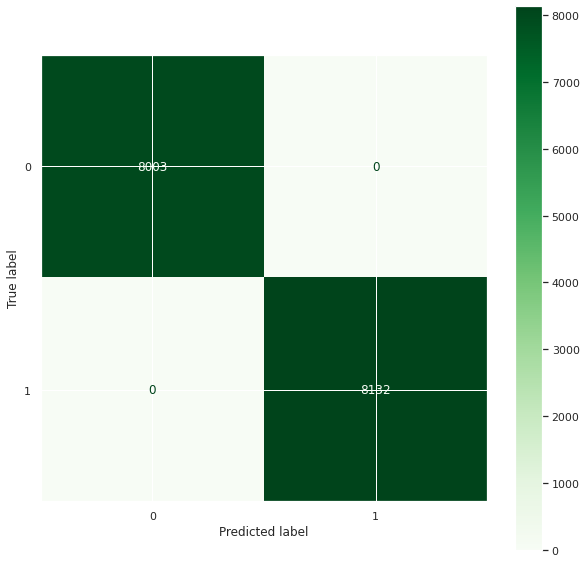

In [ ]:
plot_confusion_matrix(gridEF,X_test,y_test,cmap = "Greens")

###**7.8 Gradient Boosting**

Search for the best model parameters with GridSearchCV.

In [ ]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=4,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [ ]:
print(gridGB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


Prediction according to this model.

In [ ]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

0.9996901146575767


Model metrics:

In [ ]:
resultsGB2 = train_evaluate_model(y_test)
resultsGB2.index = ['Gradient Boosting - Method 2']
results = results.append(resultsGB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

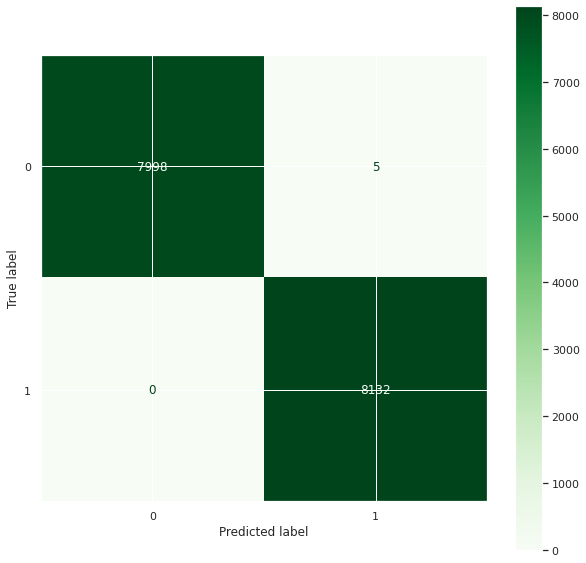

In [ ]:
plot_confusion_matrix(gridGB,X_test,y_test,cmap = "Greens")

**The model misses only 5 people: they are predicted to have a stroke when they will actually be healthy.**

###**7.9 Ada Boost**

Search for the best model parameters with GridSearchCV.

In [ ]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [ ]:
print(gridAB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


Prediction according to this model.

In [ ]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

1.0


**Here too, the model predicts a stroke perfectly.**

Model metrics:

In [ ]:
resultsAB2 = train_evaluate_model(y_test)
resultsAB2.index = ['Ada Boost - Method 2']
results = results.append(resultsAB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

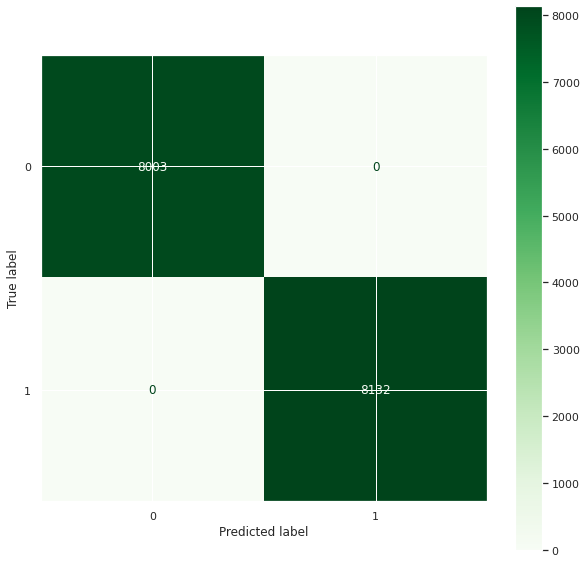

In [ ]:
plot_confusion_matrix(gridAB,X_test,y_test,cmap = "Greens")

###**7.10 Stacking Voting**

Search for the best model parameters with GridSearchCV.
I chose as estimators the two algorithms with the highest accuracy.

In [ ]:
# The combined model--KNN and Random Forest
estimators = [('KNN', gridKNN), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.998 total time=   0.1s

[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.999 total time=   0.1s

[CV 3/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.1s

[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.998 total time=   0.1s

[CV 5/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.1s

[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.998 total time=   0.2s

[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.999 total time=   0.2s

[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.2s

[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.998 total time=   0.2s

[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.2s

[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.998 total time=   0.1s

[CV 2/5] END ...n_neighbors=3, weig

Prediction according to this model.

In [ ]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)

Overfitting Checking:

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0

1.0


**Here too, the model predicts a stroke perfectly.**

Model metrics:

In [ ]:
resultsVC2 = train_evaluate_model(y_test)
resultsVC2.index = ['Stacking Voting - Method 2']
results = results.append(resultsVC2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.943580,0.946651,0.910495,0.985797,0.942914,0.942914
Logistic Regression - Method 1,0.683345,0.673230,0.707166,0.642403,0.683991,0.683991
Naive Bayes - Method 1,0.663136,0.619419,0.726458,0.539873,0.665083,0.665083
Support Vector Machine - Method 1,0.953948,0.956199,0.924682,0.989939,0.953379,0.953379
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558
Extra Trees - Method 1,0.993239,0.993385,0.987002,0.999852,0.993134,0.993134
Gradient Boosting - Method 1,0.978514,0.978952,0.973935,0.984021,0.978427,0.978427
Ada Boost - Method 1,0.990309,0.990493,0.986784,0.994230,0.990247,0.990247
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779


Confusion Matrix

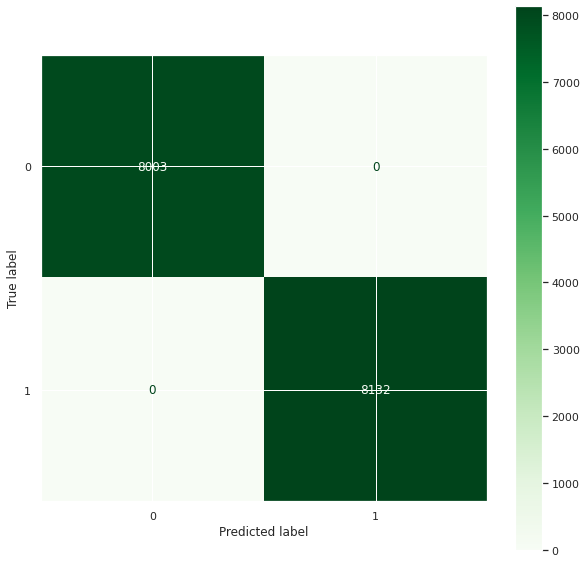

In [ ]:
plot_confusion_matrix(VC,X_test,y_test,cmap = "Greens")

#**8. Summary**

###**8.1 Conclusions & Suggestions For Improvement**

In [ ]:
#order the result df by accuracy from high to low.
results.sort_values(results.columns[0], ascending = False)

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest - Method 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ada Boost - Method 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Extra Trees - Method 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Stacking Voting - Method 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting - Method 2,0.999690,0.999693,0.999386,1.000000,0.999688,0.999688
Decision Trees - Method 2,0.999442,0.999447,0.998894,1.000000,0.999438,0.999438
Stacking Voting - Method 1,0.998798,0.998818,0.997638,1.000000,0.998779,0.998779
Decision Trees - Method 1,0.998723,0.998744,0.997638,0.999852,0.998705,0.998705
Random Forest - Method 1,0.997596,0.997638,0.995288,1.000000,0.997558,0.997558


* Feature selection reduced model noise for most algorithms.
* The algorithms based on decision trees yield impressive results.
* The results of the Logistic Regression and Naive Bayes algorithms were not good for any method.
* The KNN algorithm showed a huge improvement between method 2 and method 1.
* Method 2 yielded 100% accuracy (without any misses) for 5 algorithms.

**Health features are more likely to affect the goal column - adding such features can improve models in the medical field.**

**According to the results in this study, using one of the models that yielded 100% accuracy can serve as an excellent tool for predicting stroke.**

**Test the models with new data can help validate the models.**